In [1]:
import pandas as pd
import numpy as np

In [2]:
donors = pd.read_csv('data/donations.csv')
donors.shape

(25000, 14)

In [3]:
donors.dtypes

target                     int64
gender_F                   int64
income_high                int64
income_low                 int64
country_USA                int64
country_India              int64
country_UK                 int64
age                        int64
time_since_last_gift       int64
time_since_first_gift      int64
max_gift                 float64
min_gift                 float64
mean_gift                float64
number_gift                int64
dtype: object

In [4]:
donors.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1


In [5]:
donors.describe()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.00000
mean,0.047480,0.50316,0.164320,0.208200,0.402920,0.495160,0.101920,53.605080,757.845560,2152.18212,111.167640,69.830680,90.455932,5.22572
std,0.212667,0.50000,0.370573,0.406029,0.490495,0.499987,0.302549,17.382771,342.286498,658.40422,20.377627,20.085216,15.466240,2.83908
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,32.000000,32.00000,18.000000,2.000000,18.000000,1.00000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,519.000000,1915.00000,99.000000,56.000000,80.666667,3.00000
50%,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,736.000000,2414.00000,112.000000,69.000000,90.571429,5.00000
75%,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,64.000000,985.000000,2633.00000,125.000000,82.000000,100.444444,7.00000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,109.000000,2305.000000,2771.00000,194.000000,194.000000,194.000000,18.00000


In [6]:
q = 'target'
print(f'{sum(donors[q])} donors out of {donors.shape[0]}')

1187 donors out of 25000


In [7]:
# Is each client from either USA/India/UK?
print(sum(donors.country_USA) + sum(donors.country_India) + sum(donors.country_UK))

# Is each client either high or low income?
print(sum(donors.income_high) + sum(donors.income_low))

25000
9313


Clients are from either Usa/Ind/Uk

# Feature engineering
- Is this a one-time donor?
- Time since first and last gift
- Total gift
- Average gift per time

In [8]:
# are donors with time_since_first_and_last_gift consistent with number_gift = 1??
donors['time_since_first_and_last_gift'] = donors['time_since_first_gift'] - donors['time_since_last_gift']
print(len(donors[(donors['time_since_first_and_last_gift']==0) & (donors['number_gift']!=1)]))
print(len(donors[(donors['time_since_first_and_last_gift']==0) & (donors['number_gift']==1)]))

# yes they are

0
2954


In [9]:
# assign one_time_donor
donors['one_time_donor'] = 0
donors.loc[(donors['number_gift']==1), 'one_time_donor']= 1

In [10]:
donors.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift,time_since_first_and_last_gift,one_time_donor
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7,1735,0
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1,0,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9,1656,0
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4,1549,0
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1,0,1


In [11]:
donors['sum_gift'] = donors['number_gift'] * donors['mean_gift']

# for donors with only 1 gift, mean = 0
donors['mean_gift_per_time'] = 0
donors.loc[(donors['number_gift']>1),'mean_gift_per_time'] = donors['sum_gift'] / donors['time_since_first_and_last_gift']

In [12]:
donors

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift,time_since_first_and_last_gift,one_time_donor,sum_gift,mean_gift_per_time
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.000000,7,1735,0,812.0,0.468012
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.000000,1,0,1,90.0,0.000000
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.000000,9,1656,0,864.0,0.521739
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.250000,4,1549,0,417.0,0.269206
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.000000,1,0,1,80.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,1,0,0,1,0,0,66,406,2662,94.0,43.0,68.625000,8,2256,0,549.0,0.243351
24996,0,0,0,0,0,1,0,50,621,2463,132.0,117.0,124.500000,2,1842,0,249.0,0.135179
24997,0,0,0,0,0,1,0,80,874,2143,117.0,90.0,103.500000,2,1269,0,207.0,0.163121
24998,0,0,1,0,1,0,0,85,964,2375,108.0,62.0,78.666667,3,1411,0,236.0,0.167257


## Cleaning for outliers

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

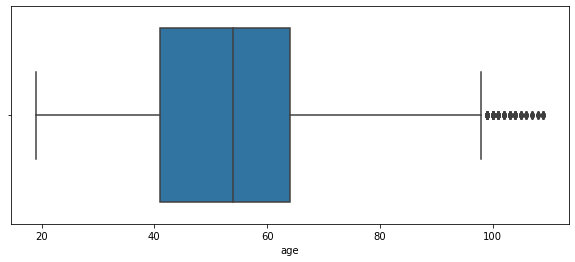

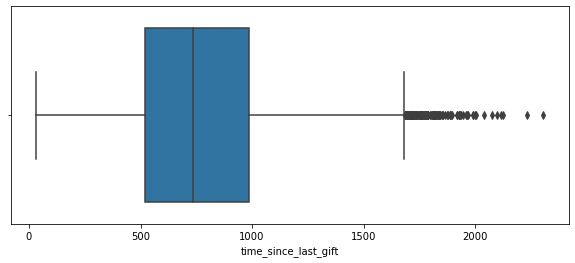

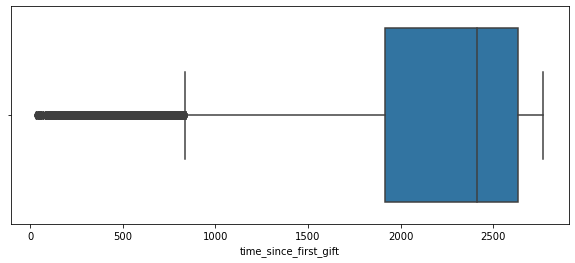

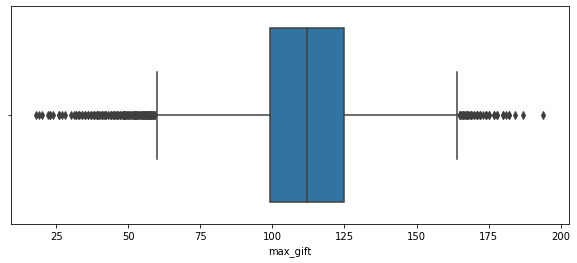

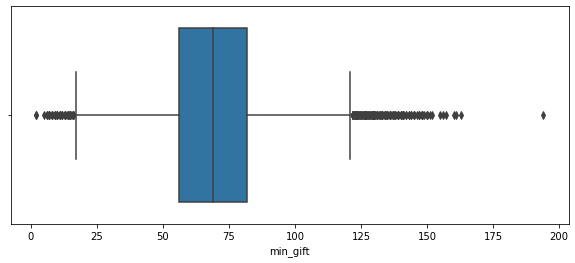

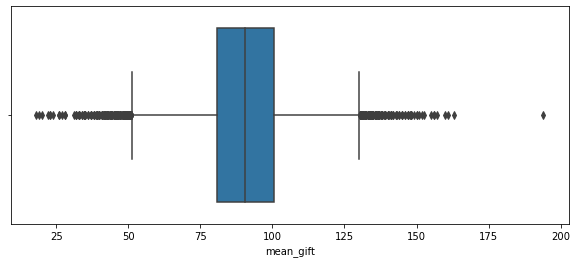

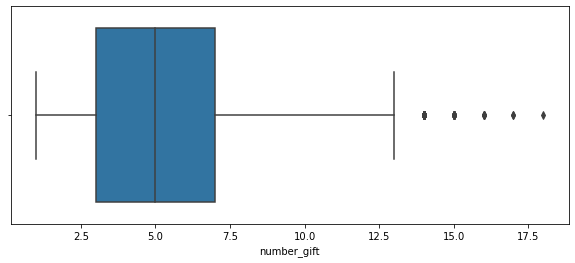

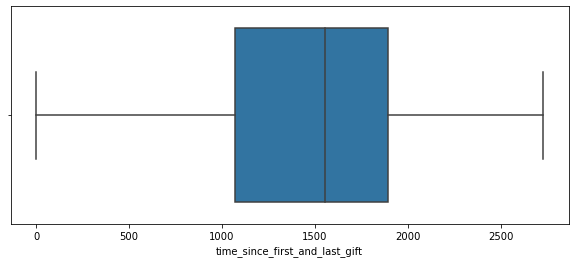

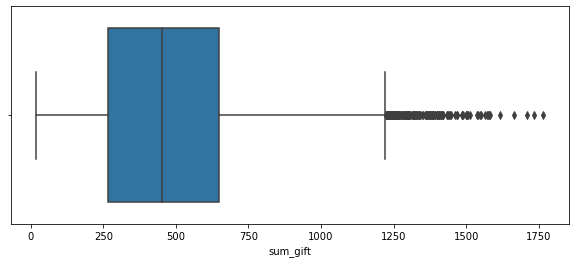

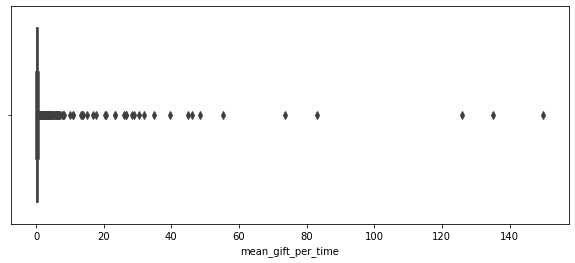

In [14]:
for abc in donors.columns:
    if (donors[abc].nunique()>2):
        plt.figure(figsize=(10,4))
        sns.boxplot(data=donors, x=abc, whis=1.5)
        plt.show()

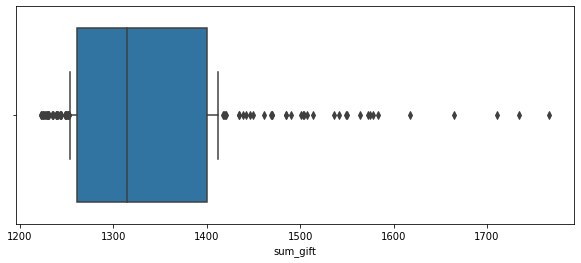

In [15]:
# Exploring sum_gift further
iqr = donors['sum_gift'].quantile(0.75) - donors['sum_gift'].quantile(0.25)
upper_whisker = donors['sum_gift'].quantile(0.75) + 1.5*iqr

plt.figure(figsize=(10,4))
sns.boxplot(data=donors[donors['sum_gift']>upper_whisker], x='sum_gift', whis=[20,80])
plt.show()

We have to remove outlier data points so that the models will perform better. My visual analysis of the boxplots tells me if there are datapoints with extreme outliers

Data points with outliers are:
min_gift > 190
mean_gift > 190
mean_gift_per_time > 120
sum_gift > 1600

In [16]:
print(donors['min_gift'].max())
print(donors['mean_gift'].max())
print(donors['mean_gift_per_time'].max())
print(donors['sum_gift'].max())

194.0
194.0
150.0
1766.0


In [17]:
print(donors.shape)
donors = donors[donors.min_gift<190]
donors = donors[donors.mean_gift<190]
donors = donors[donors.mean_gift_per_time<150]
donors = donors[donors.sum_gift<1600]
print(donors.shape)

(25000, 18)
(24993, 18)


In [18]:
donors.to_csv('data/donations_eng.csv', index=False)